**Udemy online learning platform by years of 2011 - 2017 educational courses uploaded that platform having course title name and some other columns names i have get data from the Kaggle web site.**

**My Business Goal is i will analysis the stastical analysis and visualizations for better way of understanding how data is perform along with their features names & as data analyst suggested final conclusion of identify the drawbacks &impure their platform growth**

**1.Subject Distribution in Video Uploads
2.Free vs. Paid Video Distribution
3.Free vs. Paid Video Distribution by Level
4.Total Subscribers Distribution by Subject
5.Total Reviews Distribution by Subject
6.Total Lecture videos Distribution  By Subject
7.Level Distribution by Subject
8.Total content_duration by Subject Distribution
9.Video Releases by Year for subject
10.Top 10 Course Titles by Price
11.Subject-wise Subscriber and Review Counts
12.Top 5 Courses by Subscriber Count
13.Top 5 Course Titles by Number of Reviews
14.Video Releases by Month**

**I worked on data set with python programming and few python library's to overcome My Business goal**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/udemy_online_education_courses_dataset.csv')
data.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [ ]:
data.shape

(3678, 12)

**Insights : data validation for each column having proper data in cell i hope all columns clearly valid data points**

**EDA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


**Descriptive Statistics of Numeric Features**

In [ ]:
data.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


**Std:The standard deviation, which measures the dispersion or spread of the data. A higher standard deviation indicates greater variability.
5. 25%:The 25th percentile, also known as the first quartile (Q1). 25% of the data points fall below this value.
6. 50%:The 50th percentile, or the median. 50% of the data points fall below this value.
7. 75%:The 75th percentile, or the third quartile (Q3). 75% of the data points fall below this value.**

**Insights from the Data:
Price: The average price of a course is around 66, with a standard deviation of 61. This suggests a wide range of prices, from free courses to expensive ones.
Subscribers: The average number of subscribers is 3197, with a standard deviation of 9504. This indicates significant variability in the number of subscribers across courses.
Reviews: The average number of reviews is 156, with a standard deviation of 935. This suggests a wide range of reviews, from courses with few reviews to those with thousands.
Lectures and Content Duration: The average number of lectures is around 40, and the average content duration is about 4 hours.**

In [ ]:
data=data.drop(['course_id'],axis=1)

**Detect Outliers for data set of each feature**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

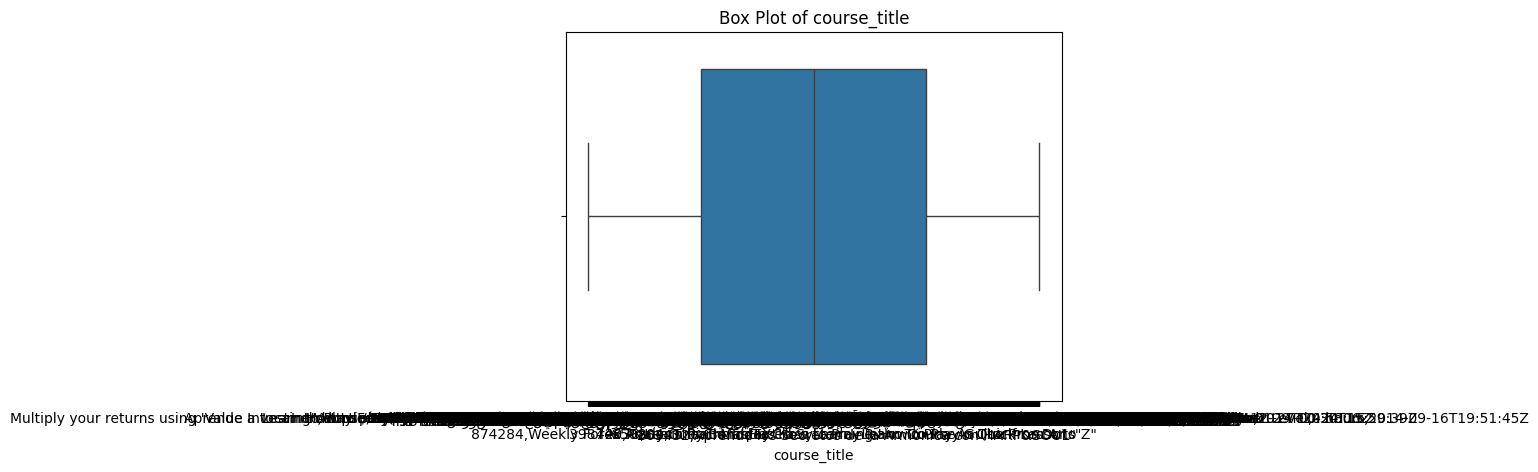

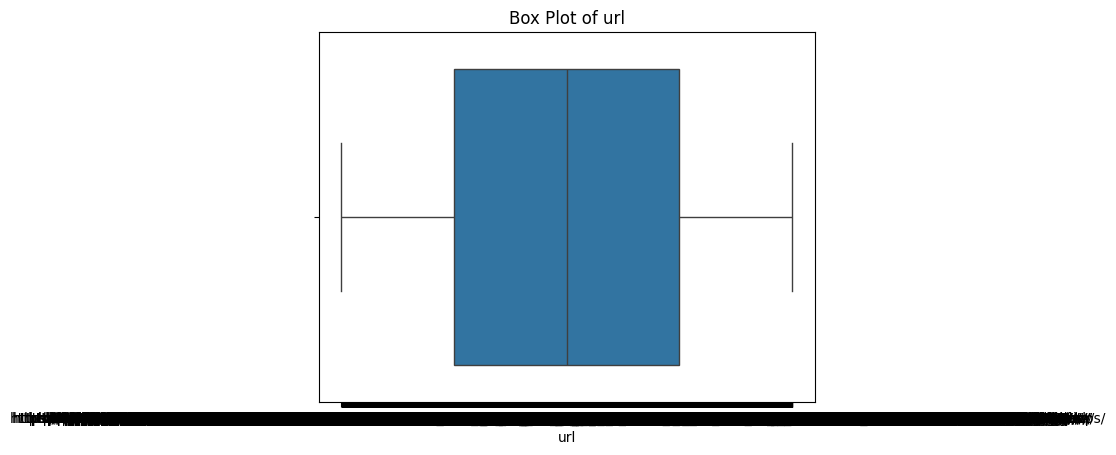

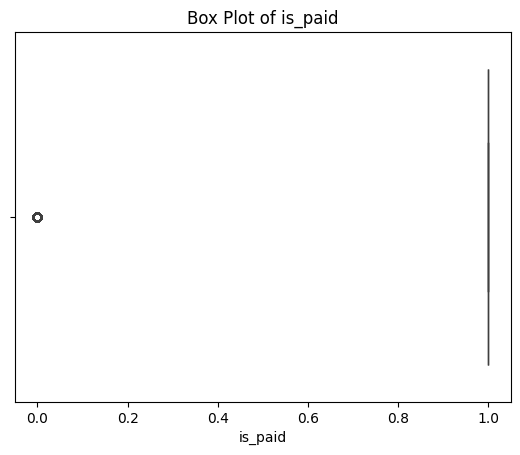

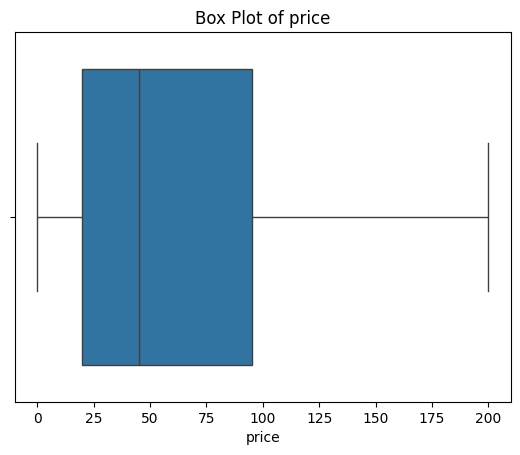

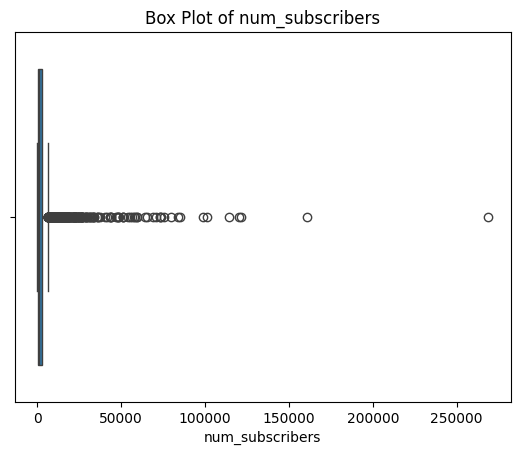

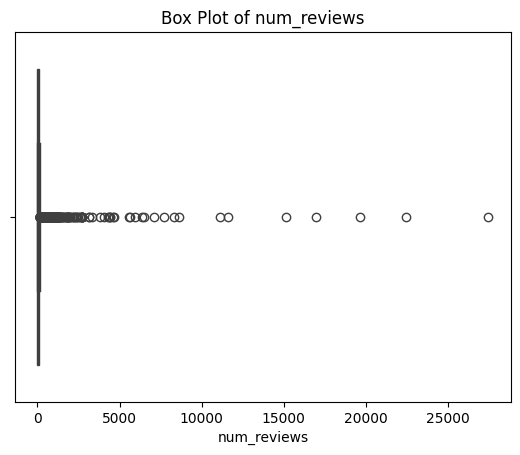

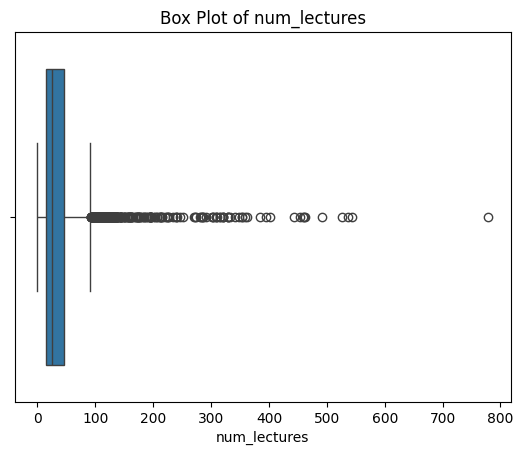

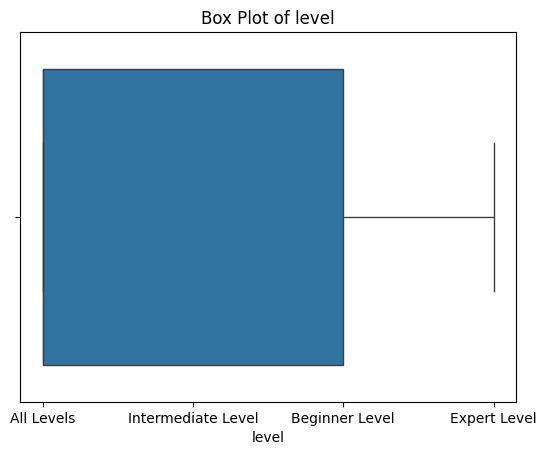

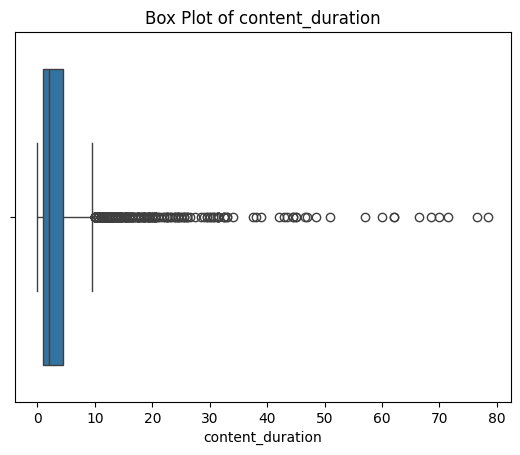

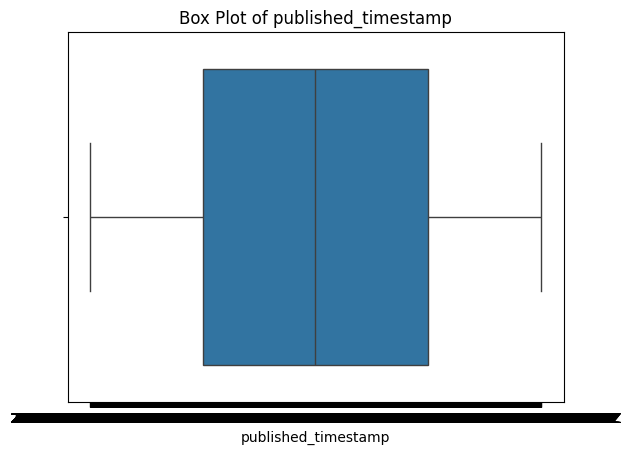

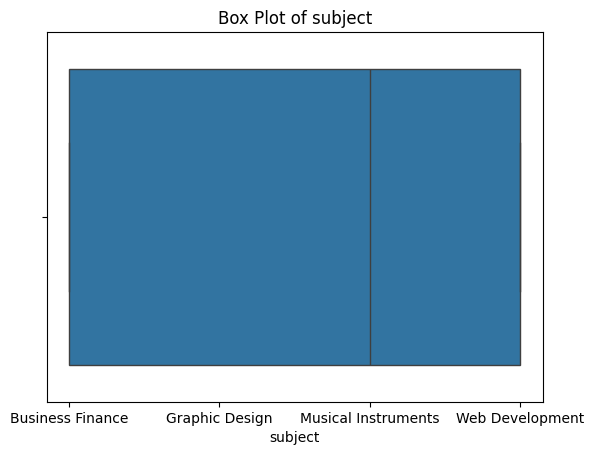

In [ ]:

for feature in data.columns:
  sns.boxplot(x=f'{feature}', data=data)
  plt.title(f'Box Plot of {feature}')
  plt.show()

**Handling Outliers for data set features**

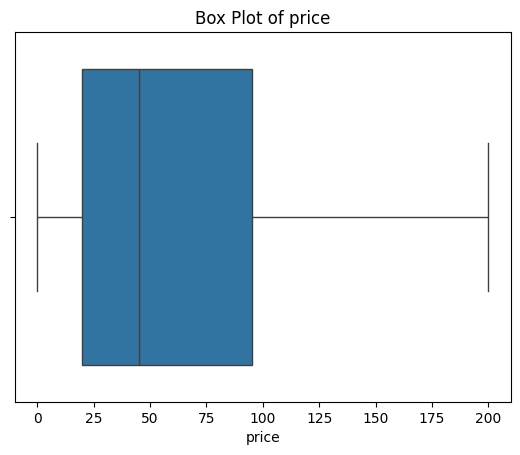

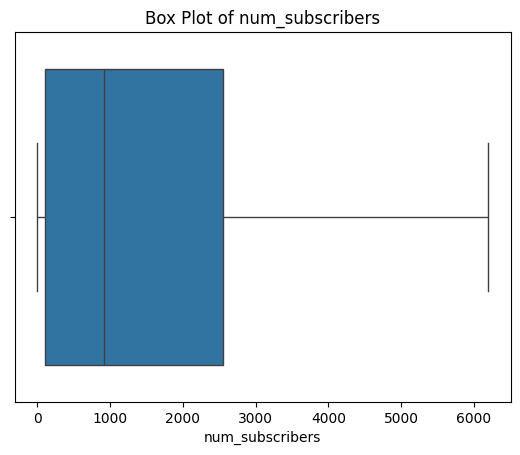

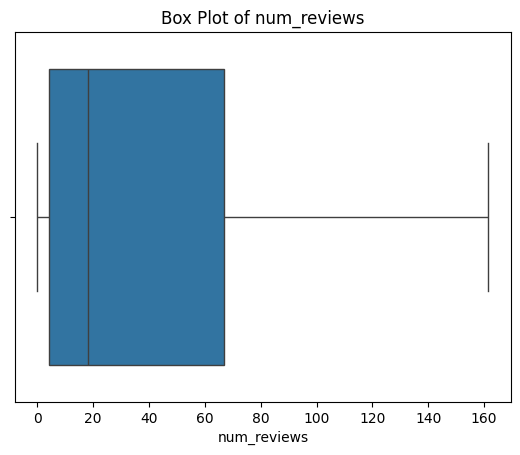

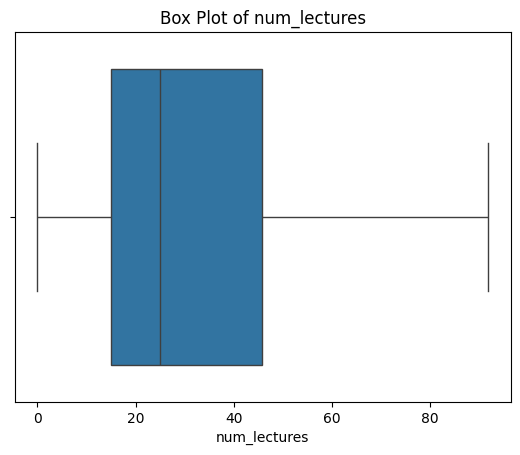

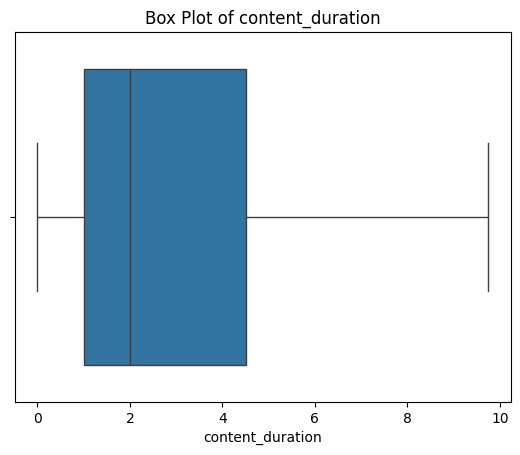

In [ ]:
import pandas as pd
import numpy as np

def handle_outliers(df, feature):

    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

    return df

numerical_features = ['price', 'num_subscribers', 'num_reviews', 'num_lectures', 'content_duration']

for feature in numerical_features:
    data = handle_outliers(data, feature)
    sns.boxplot(x=f'{feature}', data=data)
    plt.title(f'Box Plot of {feature}')
    plt.show()

**Insights : in data set what the numerical columns having their descriptive stasts means the those columns mean, count, strandad deviation ,min value, max value , 25 & 50 & 75 quentiles**

**In level feature what are the labels and their counts**

In [ ]:
print(data['level'].value_counts())

level
All Levels            1929
Beginner Level        1270
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64


**In Subject feature what are labels and their counts**

In [ ]:
print(data['subject'].value_counts())

subject
Web Development        1200
Business Finance       1195
Musical Instruments     680
Graphic Design          603
Name: count, dtype: int64


**Insights: above two line of code is two columns level and subject each column having their unique values count then we notics that a column having how many unique labels and their count with respectively**

In [ ]:
data['published_timestamp'] = pd.to_datetime(data['published_timestamp'])
data['published_year'] = data['published_timestamp'].dt.year
data['published_month'] = data['published_timestamp'].dt.month_name()
data['published_date'] = data['published_timestamp'].dt.day
data=data.drop(['published_timestamp'],axis=1)
data.head()

,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_year,published_month,published_date
0,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147.0,23.0,51.000,All Levels,1.50,Business Finance,2017,January,18
1,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792.0,161.5,91.875,All Levels,9.75,Business Finance,2017,March,9
2,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174.0,74.0,51.000,Intermediate Level,2.50,Business Finance,2016,December,19
3,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451.0,11.0,36.000,All Levels,3.00,Business Finance,2017,May,30
4,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276.0,45.0,26.000,Intermediate Level,2.00,Business Finance,2016,December,13


In [ ]:
len(data['published_year'].unique())

7

In [ ]:
def shorten_title(title):
    words = title.split()
    return ' '.join(words[:4])

data['short_title'] = data['course_title'].apply(shorten_title)
data=data.drop(['course_title'],axis=1)
data.head()

,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_year,published_month,published_date,short_title
0,https://www.udemy.com/ultimate-investment-bank...,True,200,2147.0,23.0,51.000,All Levels,1.50,Business Finance,2017,January,18,Ultimate Investment Banking Course
1,https://www.udemy.com/goods-and-services-tax/,True,75,2792.0,161.5,91.875,All Levels,9.75,Business Finance,2017,March,9,Complete GST Course &
2,https://www.udemy.com/financial-modeling-for-b...,True,45,2174.0,74.0,51.000,Intermediate Level,2.50,Business Finance,2016,December,19,Financial Modeling for Business
3,https://www.udemy.com/complete-excel-finance-c...,True,95,2451.0,11.0,36.000,All Levels,3.00,Business Finance,2017,May,30,Beginner to Pro -
4,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276.0,45.0,26.000,Intermediate Level,2.00,Business Finance,2016,December,13,How To Maximize Your


**who many people are taken paid courses and free courses**

**Univarient Analysis**

In [ ]:
import plotly.graph_objects as ob
import plotly.express as px

In [ ]:
names=data['subject'].unique()
values=data['subject'].value_counts()
title = "Subject Distribution in Video Uploads"
figure = px.pie(names=names, values=values, title=title)
figure.show()

**after visualization total uploaded videos are most videos uploaded in subject of Business Finance & Graphic design around out off 100 % those two subjects having 32.6% and 32.5% approximately both having same video uploads**

In [ ]:
X,Y=data['is_paid'].unique()
X_value,Y_value=data['is_paid'].value_counts()
figure=px.pie(data_frame=data,names=(X,Y),values=(X_value,Y_value),
              title="Free vs. Paid Video Distribution"
              )
figure.show()

**then after visualization videos provided free and paid payment method feature distribution videos uploaded then conclution most of videos are uploaded by paid payment method nearly 92% or 3368 videos and free available videos are 8% or 310 videos**

**Bivarient Analysis**

In [ ]:
levels = data['level'].unique()
grouped_data = data.groupby(['level', 'is_paid']).size().unstack(fill_value=0)
grouped_data=pd.DataFrame(grouped_data)
grouped_data


is_paid,False,True
level,,
All Levels,122,1807
Beginner Level,158,1112
Expert Level,0,58
Intermediate Level,30,391


In [ ]:

data1 = {
    "level": ["All Levels","Expert Level", "Intermediate Level","Beginner Level"],
    "Free": [122, 158, 0, 30],
    "Paid": [1807, 1112, 58, 391]
}
df = pd.DataFrame(data1)
fig = px.bar(df, x="level", y=["Free", "Paid"], barmode="group",
             title="Free vs. Paid Video Distribution by Level")

fig.show()

**after visualization how many videos free and paid videos are available in level the course are 4 levels are in level feature then they are  all levels label having paid videos are to high 1807 videos and free videos are 122 then expert level label is having paid videos are 1112 and free videos are 158 and intermediate level label is having only paid videos only they are 58 videos and begineer level having paid videos are 391 videos and free 30 videos only as my conclusion all levels and expert level labels are having more videos of paid and free videos uploads**

In [ ]:
import pandas as pd
import plotly.express as px

grouped_data = data.groupby('subject')['num_subscribers'].sum().reset_index()

fig = px.bar(grouped_data, x='subject', y='num_subscribers',
             title=' Total Subscribers Distribution by Subject ')

fig.show()

**after visualization Total Subscribers Distribution by Subject means the in subject feature having 4 different labels they are Business Finance ,Graphic design, Music Instruments and Web developments so top one Web development hvaing high subscribers 7.98 millions people so people quit inrested in leanring Web development**

In [ ]:
import pandas as pd
import plotly.express as px

grouped_data = data.groupby('subject')['num_reviews'].sum().reset_index()

fig = px.bar(grouped_data, x='subject', y='num_reviews',
             title=' Total Reviews Distribution by Subject')

fig.show()

**after visualization Total Reviews Distribution by Subject means the in subject feature having 4 different labels they are Business Finance ,Graphic design, Music Instruments and Web developments so top one Web development hvaing high Reviews 430k people so people quit inrested in leanring Web development and give there review of course videos**

In [ ]:

grouped_data = data.groupby('subject')['num_lectures'].sum().reset_index()

fig = px.histogram(grouped_data, x='subject', y='num_lectures',
             title=' Total Lecture videos Distribution  By Subject ')

fig.show()

**after visualization Total Lecture videos Distribution By Subject so web development is to high videos uploaded having 63.38k and Business Finance having 38.755k videos**

In [ ]:

grouped_data = data.groupby(['subject', 'level']).size().unstack(fill_value=0)

fig = px.bar(grouped_data.T, title=' Level Distribution by Subject ')

fig.show()

**after visualization Level Distribution by Subject in level feature having 4 different labels they are All levels and Expert Level and Intermediate Level and Beginner level then each label of level feature having how many subject labels of videos are uploaded**

In [ ]:

grouped_data = data.groupby('subject')['content_duration'].sum().reset_index()

fig = px.bar(grouped_data, x='subject', y='content_duration',
             title=' Total content_duration by Subject Distribution')

fig.show()

In [ ]:
data.head()

,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,published_year,published_month,published_date,short_title
0,https://www.udemy.com/ultimate-investment-bank...,True,200,2147.0,23.0,51.000,All Levels,1.50,Business Finance,2017,January,18,Ultimate Investment Banking Course
1,https://www.udemy.com/goods-and-services-tax/,True,75,2792.0,161.5,91.875,All Levels,9.75,Business Finance,2017,March,9,Complete GST Course &
2,https://www.udemy.com/financial-modeling-for-b...,True,45,2174.0,74.0,51.000,Intermediate Level,2.50,Business Finance,2016,December,19,Financial Modeling for Business
3,https://www.udemy.com/complete-excel-finance-c...,True,95,2451.0,11.0,36.000,All Levels,3.00,Business Finance,2017,May,30,Beginner to Pro -
4,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276.0,45.0,26.000,Intermediate Level,2.00,Business Finance,2016,December,13,How To Maximize Your


In [ ]:
import pandas as pd
import plotly.express as px

unique_subjects = data['subject'].unique()

for subject in unique_subjects:
    subject_data = data[data['subject'] == subject]
    fig = px.pie(subject_data, names='published_year', title=f'Video Releases by Year for {subject}')
    fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

sorted_data = data.sort_values(by='price', ascending=False)
top_10_titles = sorted_data['short_title'].head(10)
top_10_data = sorted_data[['short_title', 'price']].head(10)  # Include price data

fig = px.bar(top_10_data, y='short_title', x='price',  # Change x to 'price'
             title='Top 10 Titles by Price (Descending)')
fig.update_traces(text=top_10_data['price'], textposition='outside')  # Update traces for text
fig.update_xaxes(title_text='Price (Descending)')
fig.update_yaxes(title_text='Short Title')
fig.show()

**after visualization Top 10 Titles by Price of course titles of 200 prices**

In [ ]:
import plotly.express as px

top_5_courses = data.groupby('short_title')['num_subscribers'].sum().nlargest(5).reset_index()

fig = px.bar(top_5_courses,
             x='short_title',
             y='num_subscribers',
             title='Top 5 Courses by Number of Subscribers')
fig.show()

****

**after visualization Top 5 Courses by Subscriber Counts then which course title is having more subscribers those are in above visualization**

In [ ]:
import plotly.express as px

top_5_courses_by_reviews = data.groupby('short_title')['num_reviews'].sum().nlargest(5).reset_index()

fig = px.bar(top_5_courses_by_reviews,
             x='short_title',
             y='num_reviews',
             title='Top 5 Course Titles by Number of Reviews')
fig.show()

**after visualization Top 5 Course Titles by Number of Reviews then people are give more responces of videos are by giveing their reviews so they are top 5 titles**